In [16]:
import seaborn as sns

In [1]:
%matplotlib inline

In [21]:
from collections import Counter

In [642]:
import powerlaw
import seaborn

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [247]:
data=pd.read_csv("slashdot_12property_0823.csv")

In [250]:
np.log(82144)

11.316229083670867

In [14]:
data.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,0,0,24,199,5,29,0.016723,0.019334,0.000653,0.000305,170,0.745614,0.023877,0.009470,0.187191,0.14454
1,1,1,71,95,24,21,0.004183,0.022558,0.000621,0.000231,74,0.637931,0.036660,0.015856,0.209969,0.15598
2,2,2,0,20,0,0,0.000357,0.000000,0.000000,0.000000,20,1.000000,0.026316,0.000000,0.000000,0.00000
3,3,3,11,48,0,5,0.011303,0.003093,0.000072,0.000000,43,0.811321,0.227813,0.000000,0.172787,0.00000
4,4,4,1,109,0,15,0.004614,0.010712,0.000006,0.000000,94,0.758065,0.015179,0.000000,0.000013,0.00000


In [48]:
data.describe()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
count,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,8.214400e+04,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000,82144.000000
mean,41071.500000,41071.500000,5.174718,5.174718,1.511127,1.511127,0.000391,0.000725,1.639090e-05,0.000011,3.663591,0.469742,0.054793,0.003611,0.066103,0.017169
std,23713.074593,23713.074593,18.575064,27.333433,9.944356,7.590762,0.003467,0.003413,1.715800e-04,0.000161,24.977701,0.664568,0.182795,0.041132,0.080188,0.046543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-350.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,20535.750000,20535.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41071.500000,41071.500000,1.000000,1.000000,0.000000,0.000000,0.000006,0.000000,0.000000e+00,0.000000,1.000000,0.959592,0.000000,0.000000,0.000013,0.000000
75%,61607.250000,61607.250000,3.000000,3.000000,0.000000,1.000000,0.000065,0.000139,2.007023e-07,0.000000,2.000000,1.000000,0.010870,0.000000,0.153796,0.000000
max,82143.000000,82143.000000,428.000000,2512.000000,400.000000,498.000000,0.151865,0.161218,1.768646e-02,0.016219,2481.000000,1.000000,1.000000,1.000000,0.245518,0.211460


(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
        

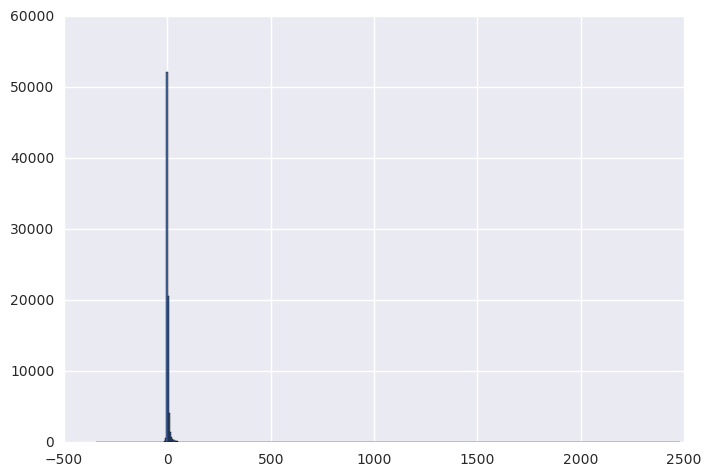

In [37]:
plt.hist(data['reputation'], bins=500)

(-20, 20)

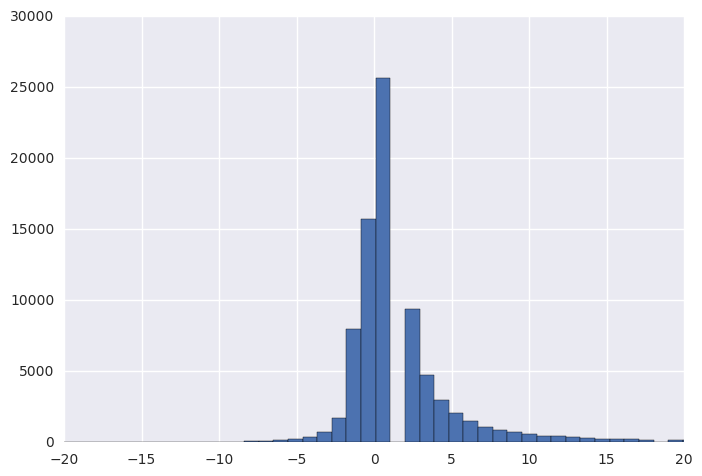

In [43]:
plt.hist(data['reputation'],bins=3000)
plt.xlim(-20,20)

In [28]:
rep=Counter(data.reputation)

In [30]:
rep

Counter({-350: 1,
         -319: 1,
         -277: 1,
         -231: 1,
         -191: 1,
         -147: 2,
         -143: 1,
         -135: 1,
         -124: 1,
         -122: 2,
         -119: 1,
         -117: 1,
         -114: 1,
         -111: 2,
         -105: 1,
         -102: 1,
         -99: 1,
         -95: 3,
         -86: 1,
         -75: 1,
         -71: 2,
         -70: 1,
         -67: 2,
         -64: 4,
         -62: 1,
         -60: 1,
         -57: 2,
         -56: 1,
         -55: 1,
         -54: 2,
         -52: 2,
         -49: 1,
         -47: 3,
         -46: 3,
         -45: 1,
         -44: 1,
         -43: 2,
         -42: 3,
         -41: 3,
         -40: 2,
         -39: 1,
         -38: 1,
         -37: 4,
         -35: 8,
         -34: 7,
         -33: 1,
         -32: 2,
         -31: 3,
         -30: 7,
         -29: 4,
         -28: 3,
         -27: 4,
         -26: 8,
         -25: 5,
         -24: 15,
         -23: 9,
         -22: 8,
         -21: 

In [92]:
powerlaw.Fit(list(rep.values())).power_law.alpha

Calculating best minimal value for power law fit


1.550177938040362

In [115]:
powerlaw.Fit(list(rep.values())).power_law.D

Calculating best minimal value for power law fit


0.03062374839986215

## This plot doesn't consider the negative reputation!!

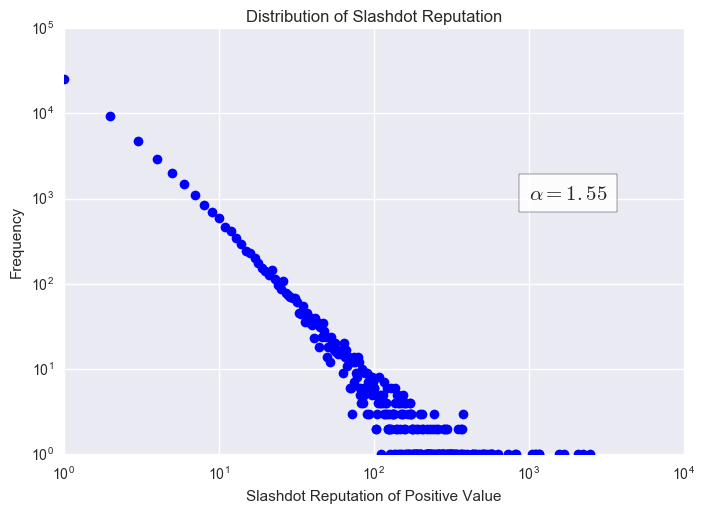

In [69]:
plt.loglog(list(rep.keys()),list(rep.values()),'b-',marker='o',linestyle='None')
plt.title("Distribution of Slashdot Reputation")
plt.xlabel("Slashdot Reputation of Positive Value")
plt.ylabel("Frequency")
plt.text(1000, 1000, r'$\alpha=1.55$',fontsize=15, style='italic', bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})


In [86]:
posi_rep=dict((k, v) for k, v in rep.items() if k >= 0)

In [87]:
posi_rep

{0: 15703,
 1: 25604,
 2: 9381,
 3: 4763,
 4: 2943,
 5: 2026,
 6: 1476,
 7: 1090,
 8: 845,
 9: 690,
 10: 586,
 11: 460,
 12: 419,
 13: 341,
 14: 290,
 15: 246,
 16: 233,
 17: 200,
 18: 174,
 19: 154,
 20: 143,
 21: 128,
 22: 144,
 23: 113,
 24: 96,
 25: 87,
 26: 108,
 27: 78,
 28: 74,
 29: 71,
 30: 69,
 31: 69,
 32: 62,
 33: 46,
 34: 44,
 35: 55,
 36: 36,
 37: 45,
 38: 41,
 39: 35,
 40: 33,
 41: 23,
 42: 40,
 43: 36,
 44: 18,
 45: 31,
 46: 24,
 47: 35,
 48: 28,
 49: 24,
 50: 14,
 51: 18,
 52: 12,
 53: 24,
 54: 20,
 55: 17,
 56: 20,
 57: 16,
 58: 17,
 59: 15,
 60: 16,
 61: 15,
 62: 17,
 63: 9,
 64: 20,
 65: 14,
 66: 17,
 67: 11,
 68: 13,
 69: 14,
 70: 6,
 71: 6,
 72: 3,
 73: 12,
 74: 14,
 75: 7,
 76: 12,
 77: 9,
 78: 8,
 79: 14,
 80: 12,
 81: 5,
 82: 6,
 83: 4,
 84: 10,
 85: 4,
 86: 6,
 87: 5,
 88: 9,
 89: 9,
 90: 9,
 91: 3,
 92: 7,
 93: 3,
 94: 6,
 95: 7,
 96: 8,
 97: 8,
 98: 5,
 99: 7,
 100: 6,
 101: 6,
 102: 5,
 103: 2,
 104: 2,
 105: 3,
 106: 4,
 108: 8,
 109: 5,
 110: 4,
 111: 4,
 

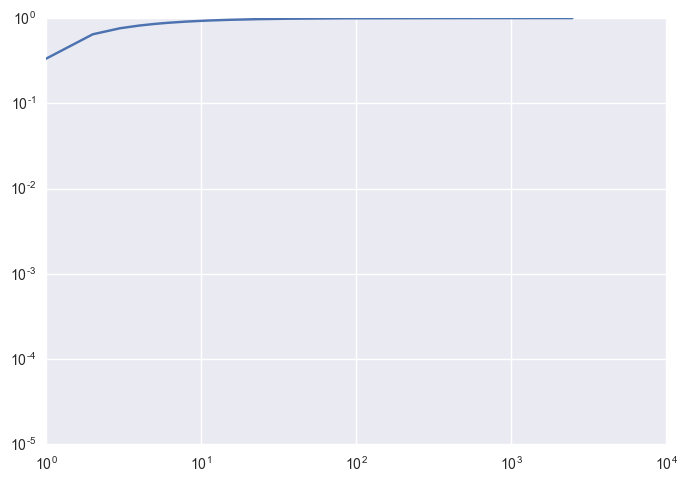

In [160]:
powerlaw.plot_cdf(data['reputation'])

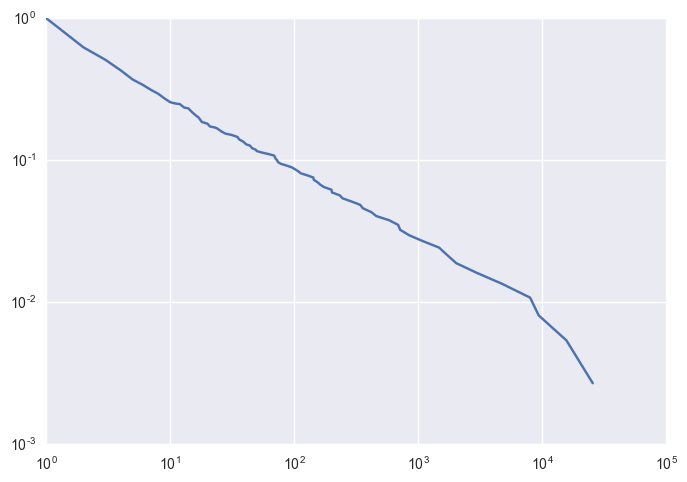

In [140]:
powerlaw.plot_ccdf(list(rep.values()))

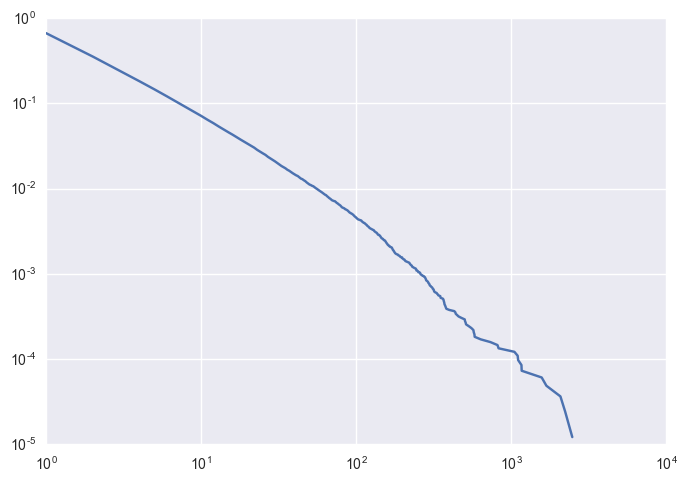

In [159]:
powerlaw.plot_ccdf(data['reputation'])

In [149]:
powerlaw.Fit(data['reputation']).

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


0.028694719627160969

In [150]:
test=powerlaw.Fit(data['reputation']).power_law.KS

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [151]:
test


<bound method Distribution.KS of <powerlaw.Power_Law object at 0x11cf35198>>

In [176]:
fittest=powerlaw.Fit(list(posi_rep.values()))
#fittest.distribution_compare(‘power_law’,‘exponential’)
fittest.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


(-0.66268485131411281, 0.075326993787493385)

In [96]:
from scipy import stats


In [217]:
import fitter

//anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted alpha distribution with error=0.0011056509111591842)
Fitted anglit distribution with error=0.0014376078130314892)
Fitted arcsine distribution with error=0.0013548846574518302)
Fitted argus distribution with error=0.001465047788622959)


//anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Fitted beta distribution with error=0.0014583854467793433)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:554: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:558: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
//anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted betaprime distribution with error=0.0013032474100648317)
Fitted bradford distribution with error=0.0011849295584822938)
Fitted burr distribution with error=0.0012265454872792756)
Fitted burr12 distribution with error=0.000991479568622278)
Fitted cauchy distribution with error=0.0013317770246462413)
Fitted chi distribution with error=0.0005436621061246102)
Fitted chi2 distribution with error=0.0004824113565339211)
Fitted cosine distribution with error=0.0014326304405303397)
Fitted dgamma distribution with error=0.0011274903828658513)
Fitted dweibull distribution with error=0.0011938282413341207)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025000000000000001.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00027777777777777778.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00046296296296296298.
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the er

Fitted erlang distribution with error=0.0014774598478924704)
Fitted expon distribution with error=0.00045709760288458547)
Fitted exponnorm distribution with error=0.0004555443735918913)
Fitted exponpow distribution with error=0.0007989560455265179)
Fitted exponweib distribution with error=0.0011905835538307547)
Fitted f distribution with error=0.0009719613613913982)
Fitted fatiguelife distribution with error=0.0009584774601848324)
Fitted fisk distribution with error=0.0008768628752749876)
Fitted foldcauchy distribution with error=0.0012920184645192755)


//anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


Fitted foldnorm distribution with error=0.0004778843893539779)
Fitted frechet_l distribution with error=0.001488579141528653)
Fitted frechet_r distribution with error=0.0011891842318550285)
Fitted gamma distribution with error=0.0014774714302094119)
Fitted gausshyper distribution with error=0.0010545363579890037)
Fitted genexpon distribution with error=0.00045708688201810536)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1894: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1899: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))


Fitted genextreme distribution with error=0.0011141167200920653)
Fitted gengamma distribution with error=0.0009164253751272684)
Fitted genhalflogistic distribution with error=0.0014145045959544768)
Fitted genlogistic distribution with error=0.0004991942927353192)
Fitted gennorm distribution with error=0.0013415299508227612)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:1753: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Fitted genpareto distribution with error=0.0010257501627493949)
Fitted gilbrat distribution with error=0.0011446660339516255)
Fitted gompertz distribution with error=0.0002237040453434086)
Fitted gumbel_l distribution with error=0.0013933531529067855)
Fitted gumbel_r distribution with error=0.0005015994331638333)
Fitted halfcauchy distribution with error=0.0011222231674900376)
Fitted halfgennorm distribution with error=0.0010612900372567145)
Fitted halflogistic distribution with error=0.0002793284940248302)
Fitted halfnorm distribution with error=0.00027522504961879603)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:2544: RuntimeWarning: overflow encountered in cosh
  return 1.0/(np.pi*np.cosh(x))


Fitted hypsecant distribution with error=0.0007003657958179332)
Fitted invgamma distribution with error=0.0010822047639438583)
Fitted invgauss distribution with error=0.0010481180818625719)
Fitted invweibull distribution with error=0.0013344205224668246)
Fitted johnsonsb distribution with error=0.001429915976529357)
Fitted johnsonsu distribution with error=0.0013611416320452234)
Fitted kappa3 distribution with error=0.0008459796407754313)
Fitted kappa4 distribution with error=0.0014469351321545168)


//anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:35: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)


SKIPPED ksone distribution (taking more than 30 seconds)


//anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


Fitted kstwobign distribution with error=0.0006868738568805685)
Fitted laplace distribution with error=0.0008666323461649248)
Fitted levy distribution with error=0.00110571907494784)
Fitted levy_l distribution with error=0.00147165337362967)
SKIPPED levy_stable distribution (taking more than 30 seconds)
Fitted loggamma distribution with error=0.0011294002750188623)
Fitted logistic distribution with error=0.0004973671341053876)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:3157: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


Fitted loglaplace distribution with error=0.0009193907722206143)
Fitted lognorm distribution with error=0.0012436011294762826)
Fitted lomax distribution with error=0.0010721063268012792)
Fitted maxwell distribution with error=0.0006905346596282665)


//anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
//anaconda/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


Fitted mielke distribution with error=0.0014596793665004196)
Fitted nakagami distribution with error=0.000719785690912068)
SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
Fitted norm distribution with error=0.0006363498457969498)
Fitted pareto distribution with error=0.001072794381227003)
Fitted pearson3 distribution with error=0.0009661397577373784)
SKIPPED powerlaw distribution (taking more than 30 seconds)
Fitted powerlognorm distribution with error=0.0013758454845190053)
Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution with error=0.00039919593491804183)
Fitted rdist distribution with error=0.0009339826527272701)
Fitted recipinvgauss distribution with error=0.000940413904850026)
Fitted reciprocal distribution with error=0.0014774779910863547)
Fitted rice distribution with error=0.0005790742556178036)
SKIPPED rv_continuous distribution (takin

//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4685: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]


Fitted trapz distribution with error=0.0014863309834230725)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4734: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(x < c, 2*x/c, 2*(1-x)/(1-c))


Fitted triang distribution with error=0.0014388962508571728)
Fitted truncexpon distribution with error=0.0014441479661763373)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4838: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4838: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)
//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:3911: RuntimeWarning: overflow encountered in multiply
  trm1 = np.sqrt(2)*nc*x*sc.hyp1f1(n/2+1, 1.5, valF)


Fitted truncnorm distribution with error=0.0014774779910863547)


//anaconda/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:4896: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


SKIPPED tukeylambda distribution (taking more than 30 seconds)
Fitted uniform distribution with error=0.0014616304922020176)
Fitted vonmises distribution with error=5.744781695739801e+18)
Fitted vonmises_line distribution with error=0.0008894866387108996)
Fitted wald distribution with error=0.0008818958950405745)
Fitted weibull_max distribution with error=0.001488579141528653)
Fitted weibull_min distribution with error=0.0011891842318550285)
Fitted wrapcauchy distribution with error=nan)


//anaconda/lib/python3.5/site-packages/scipy/optimize/optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


,sumsquare_error
gompertz,0.000224
halfnorm,0.000275
halflogistic,0.000279
skewnorm,0.000373
rayleigh,0.000399


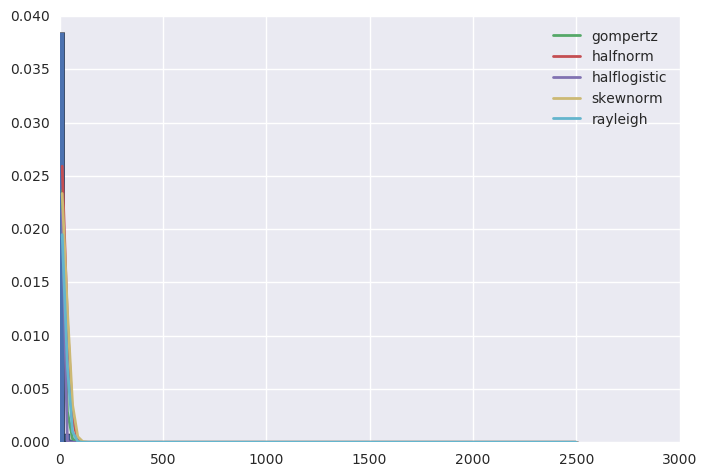

In [219]:
ff= fitter.Fitter(data['posi_indegree'])
ff.fit()
ff.summary()

In [164]:
dist=getattr(scipy.stats, 'powerlaw')
params=dist.fit(data.reputation)

In [166]:
params=dist.fit(data.reputation)

In [167]:
params

(0.4784023401225162, -350.00000000000011, 2850.2519364318659)

In [196]:
!pip install fitter

  Running setup.py bdist_wheel for fitter ... - \ done
  Stored in directory: /Users/zhangqian/Library/Caches/pip/wheels/d2/54/9c/d85de44fe91f0e4683db187ea91d7468e213bad0ee48374dd2
Successfully built fitter


//anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


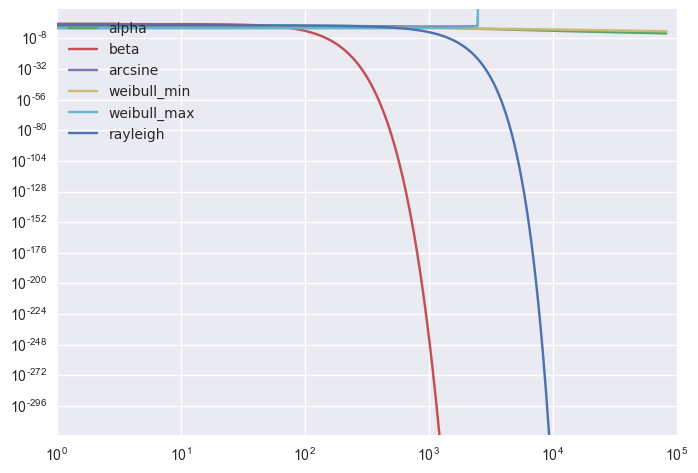

In [179]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = len(data)
x = scipy.arange(size)
# creating the dummy sample (using beta distribution)
y = data.reputation
# creating the histogram
h = plt.hist(y, bins=range(48))

dist_names = ['alpha', 'beta', 'arcsine',
              'weibull_min', 'weibull_max', 'rayleigh']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.loglog(pdf_fitted, label=dist_name)
    #plt.xlim(0,47)
plt.legend(loc='upper left')
plt.show()

//anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


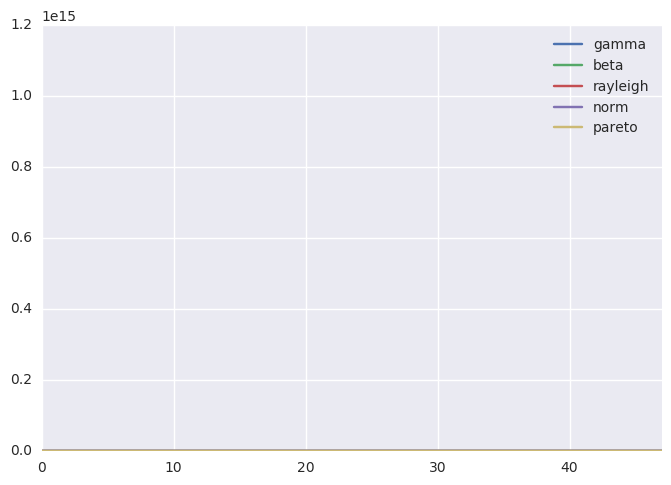

In [173]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
#size=data.reputation
#x = scipy.arange(size)
#y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
#h = plt.hist(y, bins=range(48), color='w')

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']
#dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 


for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(data.reputation)
    pdf_fitted = dist.pdf(data.reputation, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()

In [110]:
#stats.kstest(list(posi_rep.values()), 'powerlaw',alternative='two-sided', mode='approx',args=(5,))

KstestResult(statistic=1.0, pvalue=0.0)

In [ ]:
'norm','alpha','levy','powerlaw','lognormal','powerlognorm','chi','t'

In [194]:
dist=getattr(scipy.stats, 't')
params=dist.fit(data.reputation)

In [192]:
params

(0.03435803878712855, -21.000000000000004, 4.6996701152875477)

In [195]:
stats.kstest(data['reputation'], 't', args=params)

KstestResult(statistic=0.20634089030592312, pvalue=0.0)

In [197]:
stats.kstest(data['reputation'], 'norm')

KstestResult(statistic=0.50694418120683671, pvalue=0.0)

In [169]:
stats.kstest(data['reputation'], 'powerlaw',args=params)

KstestResult(statistic=0.59965021184460587, pvalue=0.0)

In [ ]:
fit.power_law.D #check the ks distance

In [90]:
powerlaw.KS(posi_rep.values())

AttributeError: module 'powerlaw' has no attribute 'KS'

In [132]:
powerlaw.Fit(list(posi_rep.values())).power_law.likelihoods(list(posi_rep.values()))

Calculating best minimal value for power law fit


array([  2.66753891e-07,   1.25501111e-07,   5.90430345e-07,
         1.67944216e-06,   3.52889876e-06,   6.27653380e-06,
         1.02297293e-05,   1.63274912e-05,   2.41795464e-05,
         3.30506371e-05,   4.25212780e-05,   6.17675614e-05,
         7.13329258e-05,   9.80079132e-05,   1.25825835e-04,
         1.62175422e-04,   1.76339885e-04,   2.23173782e-04,
         2.76643797e-04,   3.33968380e-04,   3.74406075e-04,
         4.44187542e-04,   3.70403661e-04,   5.38334126e-04,
         6.92238724e-04,   8.05732855e-04,   9.53526535e-04,
         1.03417389e-03,   1.10233449e-03,   1.15199832e-03,
         1.15199832e-03,   2.15294267e-03,   2.30571841e-03,
         1.63434849e-03,   3.14206774e-03,   2.22717295e-03,
         2.57102280e-03,   3.28159063e-03,   3.59331908e-03,
         6.27050621e-03,   2.67082262e-03,   3.14206774e-03,
         9.15136083e-03,   3.95705359e-03,   5.87213678e-03,
         3.28159063e-03,   4.62962701e-03,   5.87213678e-03,
         1.34839192e-02,

(array([  8.39000000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

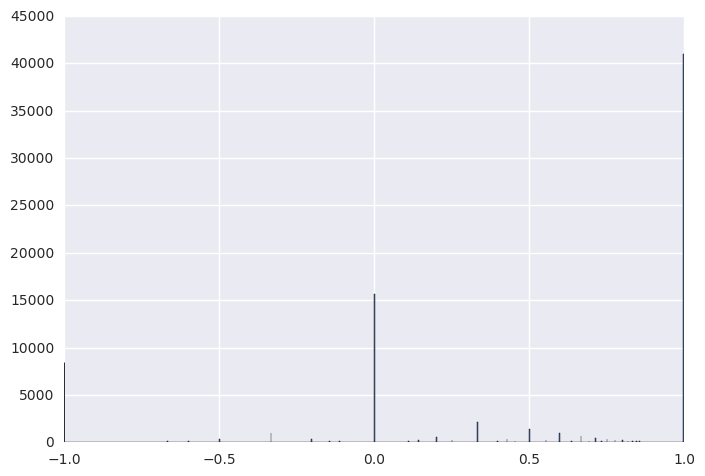

In [46]:
plt.hist(data['normalized_reputation'], bins=1000)

In [22]:
norm_rep=Counter(data.normalized_reputation)


In [45]:
norm_rep

Counter({0.7734375: 1,
         0.75: 372,
         0.49659863945578231: 1,
         -0.125: 17,
         1.0: 40987,
         0.77263157894736845: 1,
         0.68627450980392157: 1,
         0.51063829787234039: 2,
         0.89130434782608692: 1,
         0.52631578947368418: 1,
         0.55436720142602491: 1,
         0.86376021798365121: 1,
         0.55000000000000004: 4,
         0.96129032258064517: 1,
         -0.0625: 4,
         -0.3888888888888889: 1,
         0.7567567567567568: 1,
         0.65000000000000002: 3,
         -0.35714285714285715: 3,
         0.60869565217391308: 2,
         0.31372549019607843: 1,
         0.17460317460317459: 1,
         0.52317880794701987: 2,
         0.68181818181818177: 1,
         0.22222222222222221: 13,
         0.14754098360655735: 2,
         -0.083333333333333329: 5,
         0.75129533678756477: 1,
         0.42138364779874216: 1,
         0.68240343347639487: 1,
         0.94029850746268662: 1,
         0.82558139534883723: 1,


In [25]:
powerlaw.Fit(list(norm_rep.values())).power_law.alpha

Calculating best minimal value for power law fit


1.7498987676149946

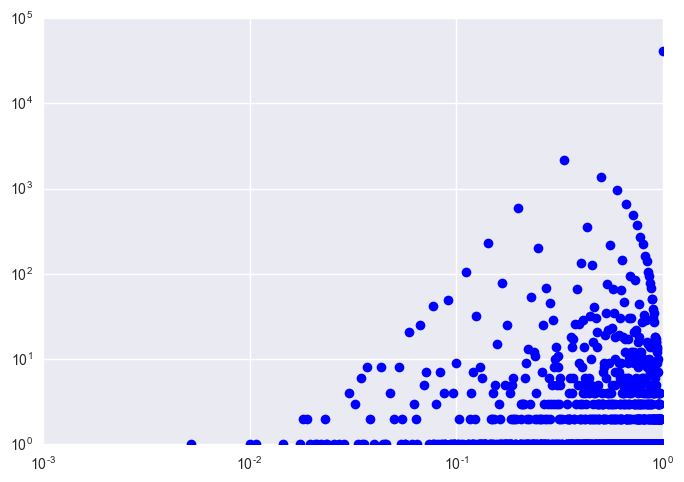

In [26]:
plt.loglog(list(norm_rep.keys()),list(norm_rep.values()),'b-',marker='o',linestyle='None')

In [31]:
import scipy

In [32]:
scipy.stats.skew(data['normalized_reputation'], axis=0, bias=True) #-0.88 is highly right skewed

-1.0061365115779912

In [198]:
scipy.stats.skew(data['reputation'], axis=0, bias=True)

44.980380924136675

In [16]:
scipy.stats.skew(data, axis=0, bias=True)

array([ -4.15031543e-17,  -4.15031543e-17,   8.88196721e+00,
         4.06182484e+01,   1.46905285e+01,   2.74777390e+01,
         4.54318294e+01,  -8.82623858e-01,   2.12014264e+01,
         1.48561012e+01])

## reputation distribution

In [50]:
import powerlaw

In [51]:
fit_rep=powerlaw.Fit(data['reputation'])

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [52]:
fit_rep.power_law.alpha

2.7719429334735377

In [53]:
fit_rep.power_law.sigma

0.10783701280837028

> import powerlaw
> fit = powerlaw.Fit(data)
Calculating best minimal value for power law fit
> fit.power_law.alpha
2.273
> fit.power_law.sigma
0.167
> fit.distribution_compare(’power_law’, ’exponential’)

In [54]:
fit_rep.distribution_compare('power_law','exponential')

(48.66274300953215, 0.00097922139464094054)

## analyze the lognormal distribution

In [61]:
fit_rep.distribution_compare('power_law','lognormal')

(-0.066630386628638405, 0.82546272896063466)

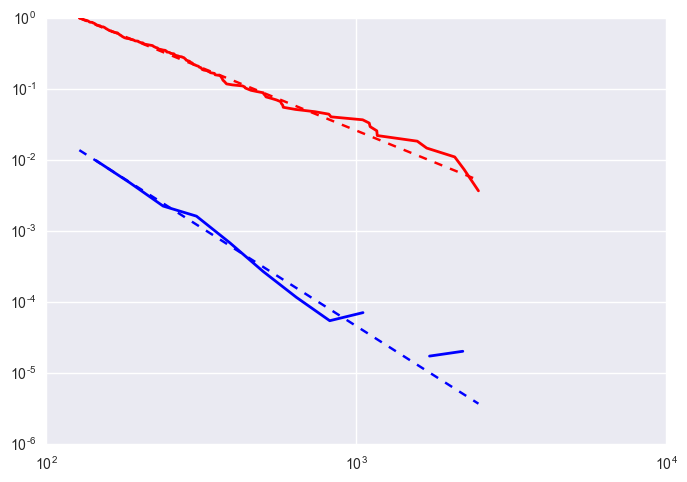

In [62]:
fig2 = fit_rep.plot_pdf(color='b',linewidth=2)
fit_rep.power_law.plot_pdf(color='b',linestyle='--', ax=fig2)
fit_rep.plot_ccdf(color='r', linewidth=2, ax=fig2)
fit_rep.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)

In [60]:
fit_norm_repu.xmin

NameError: name 'fit_norm_repu' is not defined

In [33]:
##if the fixed xmin is the real min?? 
fit_norm_repu.fixed_xmin

False

In [34]:
fit_norm_repu.xmax

# Linear Regression on original data without normalization

In [530]:
x=data[['posi_outdegree', 'posi_indegree','neg_outdegree', 'neg_indegree','posi_eigenvalue', 'neg_eigenvalue']]


In [37]:
y1=data['reputation']
y2=data['normalized_reputation']

In [531]:
reg_no_normalization = linear_model.LinearRegression()

## linear regression between varialbes and the norm_reputation

In [584]:
data.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,0,0,24,199,5,29,0.016723,0.019334,0.000653,0.000305,170,0.745614,0.023877,0.009470,0.187191,0.14454
1,1,1,71,95,24,21,0.004183,0.022558,0.000621,0.000231,74,0.637931,0.036660,0.015856,0.209969,0.15598
2,2,2,0,20,0,0,0.000357,0.000000,0.000000,0.000000,20,1.000000,0.026316,0.000000,0.000000,0.00000
3,3,3,11,48,0,5,0.011303,0.003093,0.000072,0.000000,43,0.811321,0.227813,0.000000,0.172787,0.00000
4,4,4,1,109,0,15,0.004614,0.010712,0.000006,0.000000,94,0.758065,0.015179,0.000000,0.000013,0.00000


In [616]:
data_zscore.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,-1.732030,-1.732030,1.013477,7.091186,0.350842,3.621381,4.710468,5.452590,3.708244,1.818578,6.659437,0.415118,-0.169128,0.142434,1.510058,2.736620
1,-1.731988,-1.731988,3.543766,3.286299,2.261485,2.567462,1.093811,6.397251,3.523709,1.356876,2.815985,0.253082,-0.099200,0.297703,1.794119,2.982427
2,-1.731945,-1.731945,-0.278586,0.542390,-0.151959,-0.199076,-0.009698,-0.212538,-0.095530,-0.070856,0.654044,0.797904,-0.155788,-0.087793,-0.824352,-0.368885
3,-1.731903,-1.731903,0.313610,1.566782,-0.151959,0.459624,3.147416,0.693703,0.324910,-0.070856,1.574871,0.513990,0.946532,-0.087793,1.330431,-0.368885
4,-1.731861,-1.731861,-0.224750,3.798495,-0.151959,1.777023,1.218120,2.926248,-0.060513,-0.070856,3.616704,0.433853,-0.216712,-0.087793,-0.824186,-0.368885


In [617]:
data_zscore.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [619]:
lr_X=data_zscore[['posi_outdegree', 'posi_indegree','neg_outdegree', 'neg_indegree','posi_eigenvalue', 'neg_eigenvalue','posi_between', 'neg_between', 
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close']]
lr_Y=data_zscore['normalized_reputation']

In [620]:
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split( lr_X, lr_Y, test_size = 0.3, random_state = 100)

In [621]:
lr_model=reg_no_normalization.fit(lr_X_train, lr_y_train)

In [622]:
lr_y_pred=lr_model.predict(lr_X_test)

In [623]:
from sklearn.metrics import mean_squared_error, r2_score

In [624]:
# The coefficients
print('Coefficients: \n', lr_model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(lr_y_test, lr_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(lr_y_test, lr_y_pred))


Coefficients: 
 [ 0.13634036  0.21357864 -0.05228498 -0.15199811 -0.01582239 -0.11150849
 -0.10853489  0.1054368   0.09508467 -0.02793158  0.00472893 -0.05198049]
Mean squared error: 0.94
Variance score: 0.06


## Treel model  between variables and the norm_reputation

In [ ]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded_y_neg_indegree = lab_enc.fit_transform(y_neg_indegree)

In [627]:
from sklearn.tree import DecisionTreeRegressor

In [628]:
tree_X_train, tree_X_test, tree_y_train, tree_y_test = train_test_split(lr_X, lr_Y, test_size = 0.3, random_state = 100)

In [632]:
tree_clf = DecisionTreeRegressor() #critiron is MSE
tree_clf.fit(tree_X_train,tree_y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [635]:
tree_y_pred=tree_clf.predict(tree_X_test)

In [636]:
tree_y_pred

array([ 0.79790411,  0.79790411, -0.70684211, ..., -0.70684211,
        0.49695487, -0.70684211])

In [638]:
from sklearn.metrics import mean_squared_error
mean_squared_error(tree_y_test,tree_y_pred)

0.00016614062731814779

## linear regression from posi variables to neg_indegree

In [597]:
lr_negin_X_train, lr_negin_X_test, lr_negin_y_train, lr_negin_y_test = train_test_split(x_posi, encoded_y_neg_indegree, test_size = 0.3, random_state = 100)

In [600]:
lr_negin_model=reg_no_normalization.fit(lr_negin_X_train, lr_negin_y_train)

In [604]:
lr_negin_y_pred=lr_model.predict(lr_negin_X_test)

In [605]:
# The coefficients
print('Coefficients: \n', lr_negin_model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(lr_negin_y_test, lr_negin_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(lr_negin_y_test, lr_negin_y_pred))

Coefficients: 
 [ 0.8623391   3.15381639 -0.37774826 -0.42432002  0.1918258  -0.13319426]
Mean squared error: 29.81
Variance score: 0.19


## Tree modlle to predict neg indegree

In [559]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [502]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded_y_neg_indegree = lab_enc.fit_transform(y_neg_indegree)

In [609]:
y_neg_indegree

0         3.621381
1         2.567462
2        -0.199076
3         0.459624
4         1.777023
5        -0.067336
6        -0.199076
7         7.441838
8        15.346231
9         0.986583
10       -0.199076
11       -0.067336
12        0.064404
13        4.807040
14        0.327884
15       -0.067336
16       -0.067336
17        5.465740
18       -0.067336
19       -0.199076
20        0.064404
21        4.938780
22       -0.067336
23       -0.199076
24        0.459624
25        0.986583
26        0.196144
27        5.992699
28        3.884861
29        3.884861
           ...    
82114    -0.199076
82115    -0.199076
82116    -0.199076
82117    -0.199076
82118    -0.199076
82119    -0.199076
82120    -0.199076
82121    -0.199076
82122    -0.199076
82123    -0.199076
82124    -0.199076
82125    -0.199076
82126    -0.199076
82127    -0.199076
82128    -0.199076
82129    -0.199076
82130    -0.199076
82131    -0.199076
82132    -0.199076
82133    -0.199076
82134    -0.199076
82135    -0.

In [608]:
x_posi

,posi_outdegree,posi_indegree,posi_eigenvalue,posi_between,posi_close,posi_cluster
0,1.013477,7.091186,4.710468,3.708244,1.510058,-0.169128
1,3.543766,3.286299,1.093811,3.523709,1.794119,-0.099200
2,-0.278586,0.542390,-0.009698,-0.095530,-0.824352,-0.155788
3,0.313610,1.566782,3.147416,0.324910,1.330431,0.946532
4,-0.224750,3.798495,1.218120,-0.060513,-0.824186,-0.216712
5,3.705274,1.018001,1.631364,1.360409,1.534976,-0.031122
6,0.636625,0.103364,-0.010170,0.077174,1.340202,0.079167
7,0.851969,1.530197,0.314050,0.316406,1.300369,-0.151828
8,5.212680,17.408284,17.893228,53.191314,1.796615,-0.159558
9,1.767180,5.335084,5.997999,1.745323,1.361174,0.134015


In [607]:
encoded_y_neg_indegree

array([29, 21,  0, ...,  0,  0,  0])

In [560]:
X_train, X_test, y_train, y_test = train_test_split(x_posi, encoded_y_neg_indegree, test_size = 0.3, random_state = 100)

In [561]:
tree_neg_indegree = DecisionTreeClassifier(criterion = "entropy")
tree_neg_indegree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [562]:
y_pred=tree_neg_indegree.predict(X_test)

In [563]:
y_pred

array([8, 0, 0, ..., 0, 0, 0])

In [565]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  62.1774062652


In [566]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

42.118000324622628

In [512]:
x_posi.columns

Index(['posi_outdegree', 'posi_indegree', 'posi_eigenvalue', 'posi_between',
       'posi_close', 'posi_cluster'],
      dtype='object')

In [518]:
tree_neg_indegree.feature_importances_

array([ 0.01376668,  0.54312715,  0.03399134,  0.01671066,  0.34629155,
        0.04611262])

In [519]:
tree_neg_indegree.set_params

<bound method BaseEstimator.set_params of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=100,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>

In [520]:
dotfile = StringIO() 
tree.export_graphviz(tree_neg_indegree, out_file=dotfile) 
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("tree_predict_neg_indegree.png")

True

In [558]:
tree_neg_indegree.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=100,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>

## the regression between factors and the normalized_ reputation

In [49]:
x=data[['posi_outdegree', 'posi_indegree','neg_outdegree', 'neg_indegree','posi_eigenvalue', 'neg_eigenvalue']]

In [50]:
lr_model2=reg_no_normalization.fit(x, y2)

In [51]:
reg_no_normalization.coef_

array([  3.44407258e-03,   3.68104928e-03,  -1.58526796e-03,
        -7.38770548e-03,  -3.07779466e+00,  -2.20356466e+01])

In [52]:
reg_no_normalization.score(x, y2)

0.041053536537354662

(0, 0.002)

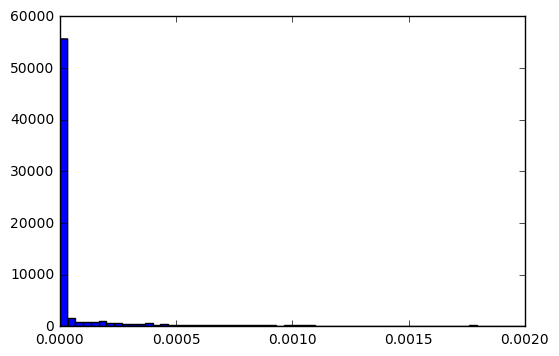

In [53]:
plt.hist(data['neg_eigenvalue'], bins=5000)
plt.xlim(0,0.002)

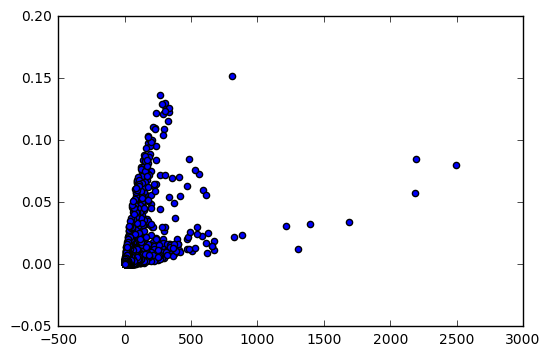

In [54]:
plt.scatter(data['posi_indegree'],data['posi_eigenvalue'])

In [200]:
import numpy as np

In [201]:
obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T

In [202]:
obs

array([[16, 32],
       [18, 24],
       [16, 16],
       [14, 28],
       [12, 20],
       [12, 24]])

In [203]:
obs.shape

(6, 2)

In [204]:
from scipy.stats import chisquare

In [205]:
obs.ravel() ## to flaten the list

array([16, 32, 18, 24, 16, 16, 14, 28, 12, 20, 12, 24])

In [214]:
chisquare([data["posi_indegree"],data["posi_eigenvalue"]])

Power_divergenceResult(statistic=array([ 198.94983759,   94.98745088,   19.99892817, ...,           nan,
          1.        ,           nan]), pvalue=array([  3.54000426e-45,   1.91596006e-22,   7.74855851e-06, ...,
                    nan,   3.17310508e-01,              nan]))

In [215]:
from scipy.stats import chi2_contingency

In [216]:
chi2_contingency([data["posi_indegree"],data["posi_eigenvalue"]])

ValueError: The internally computed table of expected frequencies has a zero element at (0, 126).

In [208]:
scipy.stats.ttest_ind(data.posi_indegree, data.posi_eigenvalue, equal_var=False) # assume independent two variables


Ttest_indResult(statistic=54.255975723214142, pvalue=0.0)

解释
The test yields a p-value of 0.0907, which means there is a 9% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

In [209]:
scipy.stats.ttest_rel(data.posi_indegree, data.posi_eigenvalue) # assume two variables dependent


Ttest_relResult(statistic=54.259536864867499, pvalue=0.0)

## KS test to test if the data is normally distributed

In [222]:
from scipy import stats


In [223]:
stats.kstest(data['neg_eigenvalue'], 'norm') #ks test把sample mean 当作population mean

KstestResult(statistic=0.5, pvalue=0.0)

## Normalization of the data

In [224]:
import numpy as np

In [225]:
data.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [226]:
#logarithm creat infinity number
log_data=np.log(data)

In [227]:
data.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,0,0,24,199,5,29,0.016723,0.019334,0.000653,0.000305,170,0.745614,0.023877,0.009470,0.187191,0.14454
1,1,1,71,95,24,21,0.004183,0.022558,0.000621,0.000231,74,0.637931,0.036660,0.015856,0.209969,0.15598
2,2,2,0,20,0,0,0.000357,0.000000,0.000000,0.000000,20,1.000000,0.026316,0.000000,0.000000,0.00000
3,3,3,11,48,0,5,0.011303,0.003093,0.000072,0.000000,43,0.811321,0.227813,0.000000,0.172787,0.00000
4,4,4,1,109,0,15,0.004614,0.010712,0.000006,0.000000,94,0.758065,0.015179,0.000000,0.000013,0.00000


In [228]:
log_data.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,-inf,-inf,3.178054,5.293305,1.609438,3.367296,-4.090990,-3.945876,-7.334474,-8.094873,5.135798,-0.293547,-3.734830,-4.659658,-1.675628,-1.934202
1,0.000000,0.000000,4.262680,4.553877,3.178054,3.044522,-5.476658,-3.791654,-7.384204,-8.375062,4.304065,-0.449525,-3.306078,-4.144192,-1.560796,-1.858027
2,0.693147,0.693147,-inf,2.995732,-inf,-inf,-7.936978,-inf,-inf,-inf,2.995732,0.000000,-3.637586,-inf,-inf,-inf
3,1.098612,1.098612,2.397895,3.871201,-inf,1.609438,-4.482653,-5.778656,-9.536922,-inf,3.761200,-0.209092,-1.479231,-inf,-1.755697,-inf
4,1.386294,1.386294,0.000000,4.691348,-inf,2.708050,-5.378599,-4.536369,-12.022405,-inf,4.543295,-0.276987,-4.187822,-inf,-11.227148,-inf


In [62]:
log_data['normalized_reputation']=data['normalized_reputation']

In [63]:
log_data.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,reputation,normalized_reputation,posi_eigenvalue,neg_eigenvalue
0,-inf,0.000000,1.791759,-inf,-inf,-inf,-inf,0.000000,-inf,-inf
1,0.000000,0.693147,-inf,5.298317,0.693147,3.433987,5.129899,0.731602,-5.267352,-4.295806
2,0.693147,1.098612,-inf,1.098612,-inf,0.693147,0.000000,0.200000,-11.637875,-10.184056
3,1.098612,1.386294,-inf,1.098612,-inf,1.098612,-inf,0.000000,-6.682551,-5.605360
4,1.386294,1.609438,3.218876,3.295837,0.693147,1.098612,3.178054,0.800000,-5.917669,-5.635542


(array([  7.87800000e+04,   1.37000000e+02,   7.40000000e+01,
          4.70000000e+01,   3.80000000e+01,   1.90000000e+01,
          1.00000000e+01,   6.00000000e+00,   8.00000000e+00,
          1.00000000e+00]),
 array([ 0.        ,  0.01522136,  0.03044272,  0.04566408,  0.06088544,
         0.0761068 ,  0.09132816,  0.10654952,  0.12177088,  0.13699224,
         0.1522136 ]),
 <a list of 10 Patch objects>)

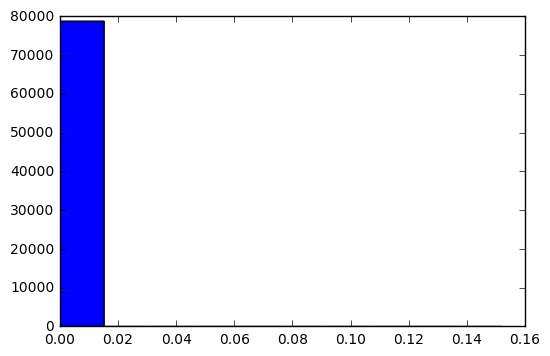

In [64]:
plt.hist(data['posi_eigenvalue'])

In [66]:
#plt.hist(log_data['posi_eigenvalue'])

In [67]:
log_data=log_data.replace([np.inf, -np.inf], np.nan)

In [69]:
#test.dropna()
log_data=log_data.fillna(value=0)

In [70]:
log_data.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,reputation,normalized_reputation,posi_eigenvalue,neg_eigenvalue
0,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.693147,0.000000,5.298317,0.693147,3.433987,5.129899,0.731602,-5.267352,-4.295806
2,0.693147,1.098612,0.000000,1.098612,0.000000,0.693147,0.000000,0.200000,-11.637875,-10.184056
3,1.098612,1.386294,0.000000,1.098612,0.000000,1.098612,0.000000,0.000000,-6.682551,-5.605360
4,1.386294,1.609438,3.218876,3.295837,0.693147,1.098612,3.178054,0.800000,-5.917669,-5.635542


In [71]:
len(log_data)

79120

(array([  5.38990000e+04,   9.32600000e+03,   5.23000000e+03,
          3.72200000e+03,   2.76800000e+03,   1.92400000e+03,
          1.16800000e+03,   6.19000000e+02,   4.14000000e+02,
          5.00000000e+01]),
 array([ 0.        ,  0.60544393,  1.21088787,  1.8163318 ,  2.42177574,
         3.02721967,  3.63266361,  4.23810754,  4.84355148,  5.44899541,
         6.05443935]),
 <a list of 10 Patch objects>)

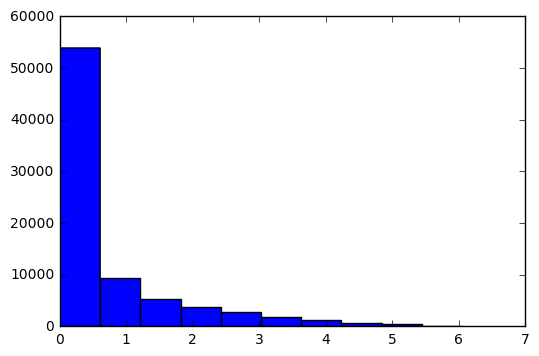

In [72]:
plt.hist(log_data['posi_outdegree'])

(array([  5.67110000e+04,   8.19700000e+03,   7.62700000e+03,
          3.57600000e+03,   1.80700000e+03,   7.65000000e+02,
          3.28000000e+02,   8.40000000e+01,   1.80000000e+01,
          7.00000000e+00]),
 array([ 0.        ,  0.78232457,  1.56464914,  2.34697371,  3.12929828,
         3.91162285,  4.69394741,  5.47627198,  6.25859655,  7.04092112,
         7.82324569]),
 <a list of 10 Patch objects>)

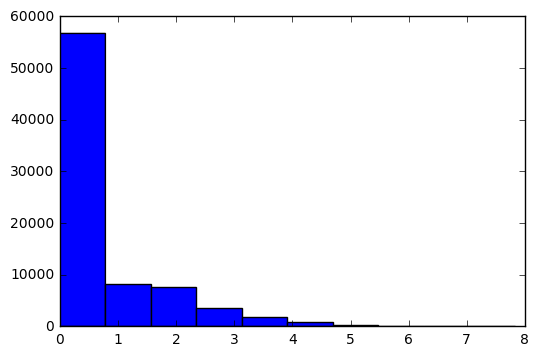

In [73]:
plt.hist(log_data['posi_indegree'])

In [74]:
# exponential 
exp_data=np.exp(data)

In [75]:
exp_data.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,reputation,normalized_reputation,posi_eigenvalue,neg_eigenvalue
0,1.000000,2.718282,4.034288e+02,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000
1,2.718282,7.389056,1.000000e+00,7.225974e+86,7.389056,2.904885e+13,2.487525e+73,2.078407,1.005171,1.013719
2,7.389056,20.085537,1.000000e+00,2.008554e+01,1.000000,7.389056e+00,2.718282e+00,1.221403,1.000009,1.000038
3,20.085537,54.598150,1.000000e+00,2.008554e+01,1.000000,2.008554e+01,1.000000e+00,1.000000,1.001253,1.003685
4,54.598150,148.413159,7.200490e+10,5.320482e+11,7.389056,2.008554e+01,2.648912e+10,2.225541,1.002695,1.003575


In [76]:
exp_data=exp_data.replace([np.inf, -np.inf], np.nan)
exp_data=exp_data.fillna(value=0)

(array([  7.91190000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  0.00000000e+000,   4.42165621e+275,   8.84331242e+275,
          1.32649686e+276,   1.76866248e+276,   2.21082810e+276,
          2.65299372e+276,   3.09515935e+276,   3.53732497e+276,
          3.97949059e+276,   4.42165621e+276]),
 <a list of 10 Patch objects>)

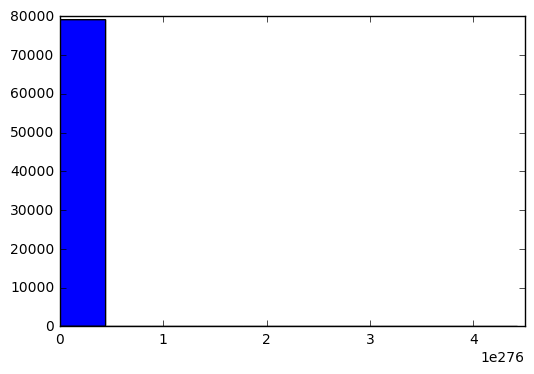

In [77]:
plt.hist(exp_data['reputation'])

In [78]:
# reciprocal
recip_data=1/data

In [79]:
recip_data.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,reputation,normalized_reputation,posi_eigenvalue,neg_eigenvalue
0,inf,1.000000,0.166667,inf,inf,inf,inf,inf,inf,inf
1,1.000000,0.500000,inf,0.005000,0.500000,0.032258,0.005917,1.366864,1.939018e+02,7.339134e+01
2,0.500000,0.333333,inf,0.333333,inf,0.500000,1.000000,5.000000,1.133091e+05,2.647764e+04
3,0.333333,0.250000,inf,0.333333,inf,0.333333,inf,inf,7.983531e+02,2.718798e+02
4,0.250000,0.200000,0.040000,0.037037,0.500000,0.333333,0.041667,1.250000,3.715445e+02,2.802106e+02


In [80]:
recip_data=recip_data.replace([np.inf, -np.inf], np.nan)
recip_data=recip_data.fillna(value=0)

In [81]:
recip_data.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,reputation,normalized_reputation,posi_eigenvalue,neg_eigenvalue
0,0.000000,1.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.500000,0.000000,0.005000,0.5,0.032258,0.005917,1.366864,193.901814,73.391340
2,0.500000,0.333333,0.000000,0.333333,0.0,0.500000,1.000000,5.000000,113309.108345,26477.638380
3,0.333333,0.250000,0.000000,0.333333,0.0,0.333333,0.000000,0.000000,798.353083,271.879836
4,0.250000,0.200000,0.040000,0.037037,0.5,0.333333,0.041667,1.250000,371.544459,280.210649


In [82]:
len(recip_data)

79120

(array([ 28593.,   5383.,   5408.,   5033.,      0.,   9513.,      0.,
             0.,      0.,  25190.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

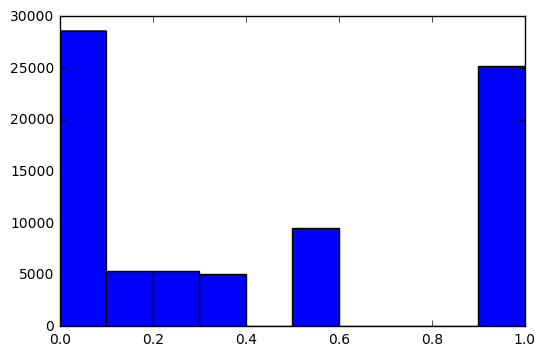

In [83]:
plt.hist(recip_data['posi_indegree'])

## 0830 apply z_score normalization

In [322]:
data=pd.read_csv("slashdot_12property_0823.csv")

In [323]:
data[:10]

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,0,0,24,199,5,29,0.016723,0.019334,0.000653,3.050995e-04,170,0.745614,0.023877,0.009470,0.187191,0.144540
1,1,1,71,95,24,21,0.004183,0.022558,0.000621,2.305455e-04,74,0.637931,0.036660,0.015856,0.209969,0.155980
2,2,2,0,20,0,0,0.000357,0.000000,0.000000,0.000000e+00,20,1.000000,0.026316,0.000000,0.000000,0.000000
3,3,3,11,48,0,5,0.011303,0.003093,0.000072,0.000000e+00,43,0.811321,0.227813,0.000000,0.172787,0.000000
4,4,4,1,109,0,15,0.004614,0.010712,0.000006,0.000000e+00,94,0.758065,0.015179,0.000000,0.000013,0.000000
5,5,5,74,33,5,1,0.006047,0.000003,0.000250,2.863008e-07,32,0.941176,0.049104,0.000000,0.189189,0.137864
6,6,6,17,8,0,0,0.000356,0.000000,0.000030,0.000000e+00,8,1.000000,0.069264,0.000000,0.173570,0.000000
7,7,7,21,47,8,58,0.001480,0.011577,0.000071,1.253863e-04,-11,-0.104762,0.027040,0.002331,0.170376,0.121099
8,8,8,102,481,83,118,0.062429,0.068030,0.009143,3.712054e-03,363,0.606010,0.025627,0.005999,0.210169,0.183828
9,9,9,38,151,1,9,0.021187,0.006495,0.000316,1.030513e-06,142,0.887500,0.079290,0.044444,0.175252,0.123726


In [324]:
data.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

(array([  8.00860000e+04,   1.18200000e+03,   3.93000000e+02,
          2.30000000e+02,   1.87000000e+02,   2.30000000e+01,
          1.00000000e+01,   1.10000000e+01,   9.00000000e+00,
          1.30000000e+01]),
 array([   0. ,   42.8,   85.6,  128.4,  171.2,  214. ,  256.8,  299.6,
         342.4,  385.2,  428. ]),
 <a list of 10 Patch objects>)

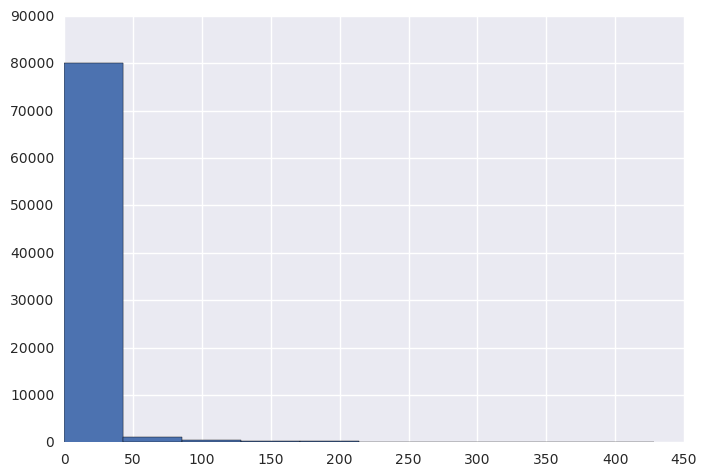

In [325]:
plt.hist(data.posi_outdegree)

In [326]:
log_data=data.copy()

In [327]:
log_data.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,0,0,24,199,5,29,0.016723,0.019334,0.000653,0.000305,170,0.745614,0.023877,0.009470,0.187191,0.14454
1,1,1,71,95,24,21,0.004183,0.022558,0.000621,0.000231,74,0.637931,0.036660,0.015856,0.209969,0.15598
2,2,2,0,20,0,0,0.000357,0.000000,0.000000,0.000000,20,1.000000,0.026316,0.000000,0.000000,0.00000
3,3,3,11,48,0,5,0.011303,0.003093,0.000072,0.000000,43,0.811321,0.227813,0.000000,0.172787,0.00000
4,4,4,1,109,0,15,0.004614,0.010712,0.000006,0.000000,94,0.758065,0.015179,0.000000,0.000013,0.00000


## becaue reputation has negative value ,so can't use log

In [328]:
#log 'posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree', 'reputation' data
log_data[['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree', 'reputation']]=np.log(log_data[['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree', 'reputation']])

In [359]:
data[:10]

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,0,0,24,199,5,29,0.016723,0.019334,0.000653,3.050995e-04,170,0.745614,0.023877,0.009470,0.187191,0.144540
1,1,1,71,95,24,21,0.004183,0.022558,0.000621,2.305455e-04,74,0.637931,0.036660,0.015856,0.209969,0.155980
2,2,2,0,20,0,0,0.000357,0.000000,0.000000,0.000000e+00,20,1.000000,0.026316,0.000000,0.000000,0.000000
3,3,3,11,48,0,5,0.011303,0.003093,0.000072,0.000000e+00,43,0.811321,0.227813,0.000000,0.172787,0.000000
4,4,4,1,109,0,15,0.004614,0.010712,0.000006,0.000000e+00,94,0.758065,0.015179,0.000000,0.000013,0.000000
5,5,5,74,33,5,1,0.006047,0.000003,0.000250,2.863008e-07,32,0.941176,0.049104,0.000000,0.189189,0.137864
6,6,6,17,8,0,0,0.000356,0.000000,0.000030,0.000000e+00,8,1.000000,0.069264,0.000000,0.173570,0.000000
7,7,7,21,47,8,58,0.001480,0.011577,0.000071,1.253863e-04,-11,-0.104762,0.027040,0.002331,0.170376,0.121099
8,8,8,102,481,83,118,0.062429,0.068030,0.009143,3.712054e-03,363,0.606010,0.025627,0.005999,0.210169,0.183828
9,9,9,38,151,1,9,0.021187,0.006495,0.000316,1.030513e-06,142,0.887500,0.079290,0.044444,0.175252,0.123726


(array([  3.00000000e+01,   8.20020000e+04,   8.80000000e+01,
          1.20000000e+01,   3.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([ -350. ,   -66.9,   216.2,   499.3,   782.4,  1065.5,  1348.6,
         1631.7,  1914.8,  2197.9,  2481. ]),
 <a list of 10 Patch objects>)

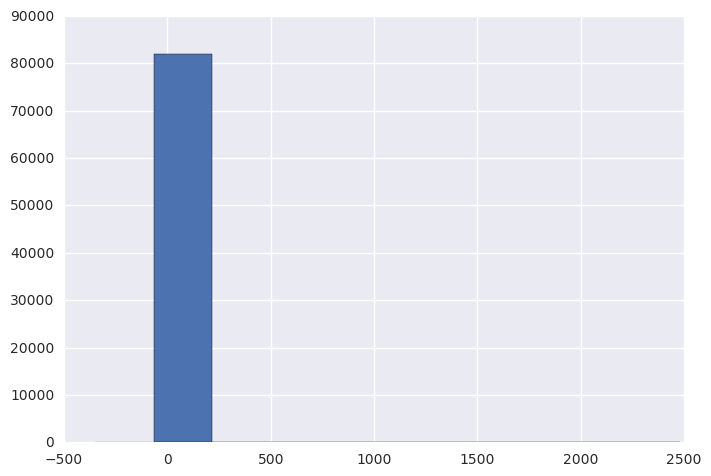

In [363]:
plt.hist(data.reputation)

In [360]:
log_data[:10]

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,0,0,3.178054,5.293305,1.609438,3.367296,0.016723,0.019334,0.000653,3.050995e-04,5.135798,0.745614,0.023877,0.009470,0.187191,0.144540
1,1,1,4.262680,4.553877,3.178054,3.044522,0.004183,0.022558,0.000621,2.305455e-04,4.304065,0.637931,0.036660,0.015856,0.209969,0.155980
2,2,2,1.000000,2.995732,1.000000,1.000000,0.000357,0.000000,0.000000,0.000000e+00,2.995732,1.000000,0.026316,0.000000,0.000000,0.000000
3,3,3,2.397895,3.871201,1.000000,1.609438,0.011303,0.003093,0.000072,0.000000e+00,3.761200,0.811321,0.227813,0.000000,0.172787,0.000000
4,4,4,0.000000,4.691348,1.000000,2.708050,0.004614,0.010712,0.000006,0.000000e+00,4.543295,0.758065,0.015179,0.000000,0.000013,0.000000
5,5,5,4.304065,3.496508,1.609438,0.000000,0.006047,0.000003,0.000250,2.863008e-07,3.465736,0.941176,0.049104,0.000000,0.189189,0.137864
6,6,6,2.833213,2.079442,1.000000,1.000000,0.000356,0.000000,0.000030,0.000000e+00,2.079442,1.000000,0.069264,0.000000,0.173570,0.000000
7,7,7,3.044522,3.850148,2.079442,4.060443,0.001480,0.011577,0.000071,1.253863e-04,NaN,-0.104762,0.027040,0.002331,0.170376,0.121099
8,8,8,4.624973,6.175867,4.418841,4.770685,0.062429,0.068030,0.009143,3.712054e-03,5.894403,0.606010,0.025627,0.005999,0.210169,0.183828
9,9,9,3.637586,5.017280,0.000000,2.197225,0.021187,0.006495,0.000316,1.030513e-06,4.955827,0.887500,0.079290,0.044444,0.175252,0.123726


In [331]:
#log_data.fillna(value=0.0001)
log_data=log_data.replace(-np.inf, 1)

In [358]:
log_data

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,0,0,3.178054,5.293305,1.609438,3.367296,1.672268e-02,0.019334,6.526473e-04,3.050995e-04,5.135798,0.745614,0.023877,0.009470,0.187191,0.144540
1,1,1,4.262680,4.553877,3.178054,3.044522,4.183285e-03,0.022558,6.209851e-04,2.305455e-04,4.304065,0.637931,0.036660,0.015856,0.209969,0.155980
2,2,2,1.000000,2.995732,1.000000,1.000000,3.572847e-04,0.000000,0.000000e+00,0.000000e+00,2.995732,1.000000,0.026316,0.000000,0.000000,0.000000
3,3,3,2.397895,3.871201,1.000000,1.609438,1.130339e-02,0.003093,7.213858e-05,0.000000e+00,3.761200,0.811321,0.227813,0.000000,0.172787,0.000000
4,4,4,0.000000,4.691348,1.000000,2.708050,4.614282e-03,0.010712,6.008081e-06,0.000000e+00,4.543295,0.758065,0.015179,0.000000,0.000013,0.000000
5,5,5,4.304065,3.496508,1.609438,0.000000,6.047047e-03,0.000003,2.498085e-04,2.863008e-07,3.465736,0.941176,0.049104,0.000000,0.189189,0.137864
6,6,6,2.833213,2.079442,1.000000,1.000000,3.556511e-04,0.000000,2.963236e-05,0.000000e+00,2.079442,1.000000,0.069264,0.000000,0.173570,0.000000
7,7,7,3.044522,3.850148,2.079442,4.060443,1.479759e-03,0.011577,7.067955e-05,1.253863e-04,NaN,-0.104762,0.027040,0.002331,0.170376,0.121099
8,8,8,4.624973,6.175867,4.418841,4.770685,6.242891e-02,0.068030,9.142899e-03,3.712054e-03,5.894403,0.606010,0.025627,0.005999,0.210169,0.183828
9,9,9,3.637586,5.017280,0.000000,2.197225,2.118670e-02,0.006495,3.158515e-04,1.030513e-06,4.955827,0.887500,0.079290,0.044444,0.175252,0.123726


(array([ 13592.,  50826.,   5639.,   4448.,   3147.,   2079.,   1270.,
           651.,    441.,     51.]),
 array([ 0.        ,  0.60591232,  1.21182464,  1.81773696,  2.42364928,
         3.0295616 ,  3.63547392,  4.24138624,  4.84729856,  5.45321088,
         6.0591232 ]),
 <a list of 10 Patch objects>)

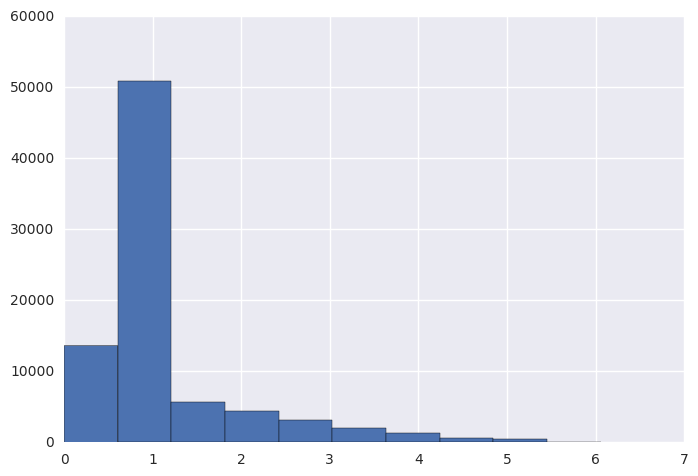

In [338]:
plt.hist(log_data.posi_outdegree)

In [348]:
log_data_zscore=log_data.apply(zscore)

In [357]:
log_data

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,0,0,3.178054,5.293305,1.609438,3.367296,1.672268e-02,0.019334,6.526473e-04,3.050995e-04,5.135798,0.745614,0.023877,0.009470,0.187191,0.144540
1,1,1,4.262680,4.553877,3.178054,3.044522,4.183285e-03,0.022558,6.209851e-04,2.305455e-04,4.304065,0.637931,0.036660,0.015856,0.209969,0.155980
2,2,2,1.000000,2.995732,1.000000,1.000000,3.572847e-04,0.000000,0.000000e+00,0.000000e+00,2.995732,1.000000,0.026316,0.000000,0.000000,0.000000
3,3,3,2.397895,3.871201,1.000000,1.609438,1.130339e-02,0.003093,7.213858e-05,0.000000e+00,3.761200,0.811321,0.227813,0.000000,0.172787,0.000000
4,4,4,0.000000,4.691348,1.000000,2.708050,4.614282e-03,0.010712,6.008081e-06,0.000000e+00,4.543295,0.758065,0.015179,0.000000,0.000013,0.000000
5,5,5,4.304065,3.496508,1.609438,0.000000,6.047047e-03,0.000003,2.498085e-04,2.863008e-07,3.465736,0.941176,0.049104,0.000000,0.189189,0.137864
6,6,6,2.833213,2.079442,1.000000,1.000000,3.556511e-04,0.000000,2.963236e-05,0.000000e+00,2.079442,1.000000,0.069264,0.000000,0.173570,0.000000
7,7,7,3.044522,3.850148,2.079442,4.060443,1.479759e-03,0.011577,7.067955e-05,1.253863e-04,NaN,-0.104762,0.027040,0.002331,0.170376,0.121099
8,8,8,4.624973,6.175867,4.418841,4.770685,6.242891e-02,0.068030,9.142899e-03,3.712054e-03,5.894403,0.606010,0.025627,0.005999,0.210169,0.183828
9,9,9,3.637586,5.017280,0.000000,2.197225,2.118670e-02,0.006495,3.158515e-04,1.030513e-06,4.955827,0.887500,0.079290,0.044444,0.175252,0.123726


In [364]:
log_data_zscore.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,-1.732030,-1.732030,2.238503,4.536252,1.159291,4.232549,4.710468,5.452590,3.708244,1.818578,NaN,0.415118,-0.169128,0.142434,1.510058,2.736620
1,-1.731988,-1.731988,3.426272,3.767014,4.207271,3.679617,1.093811,6.397251,3.523709,1.356876,NaN,0.253082,-0.099200,0.297703,1.794119,2.982427
2,-1.731945,-1.731945,-0.146673,2.146053,-0.024909,0.177217,-0.009698,-0.212538,-0.095530,-0.070856,NaN,0.797904,-0.155788,-0.087793,-0.824352,-0.368885
3,-1.731903,-1.731903,1.384155,3.056816,-0.024909,1.221224,3.147416,0.693703,0.324910,-0.070856,NaN,0.513990,0.946532,-0.087793,1.330431,-0.368885
4,-1.731861,-1.731861,-1.241768,3.910027,-0.024909,3.103219,1.218120,2.926248,-0.060513,-0.070856,NaN,0.433853,-0.216712,-0.087793,-0.824186,-0.368885


In [ ]:
log_data_zscore.fillna(value=)

In [450]:
stats.kstest(log_data_zscore['posi_indegree'], 'norm')

KstestResult(statistic=0.20395370860157225, pvalue=0.0)

In [ ]:
#How to process infinite data
#data.replace([np.inf, -np.inf], np.nan)

In [341]:
plt.hist(log_data_zscore['posi_outdegree'])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## data transfer to zscore

In [365]:
data_zscore=data.apply(zscore)

In [368]:
data_zscore.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,-1.732030,-1.732030,1.013477,7.091186,0.350842,3.621381,4.710468,5.452590,3.708244,1.818578,6.659437,0.415118,-0.169128,0.142434,1.510058,2.736620
1,-1.731988,-1.731988,3.543766,3.286299,2.261485,2.567462,1.093811,6.397251,3.523709,1.356876,2.815985,0.253082,-0.099200,0.297703,1.794119,2.982427
2,-1.731945,-1.731945,-0.278586,0.542390,-0.151959,-0.199076,-0.009698,-0.212538,-0.095530,-0.070856,0.654044,0.797904,-0.155788,-0.087793,-0.824352,-0.368885
3,-1.731903,-1.731903,0.313610,1.566782,-0.151959,0.459624,3.147416,0.693703,0.324910,-0.070856,1.574871,0.513990,0.946532,-0.087793,1.330431,-0.368885
4,-1.731861,-1.731861,-0.224750,3.798495,-0.151959,1.777023,1.218120,2.926248,-0.060513,-0.070856,3.616704,0.433853,-0.216712,-0.087793,-0.824186,-0.368885


In [369]:
stats.kstest(data_zscore['posi_outdegree'], 'norm')

KstestResult(statistic=0.39028135662777569, pvalue=0.0)

In [371]:
data_zscore.describe()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
count,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04,8.214400e+04
mean,8.647262e-18,8.647262e-18,-1.775199e-14,5.800831e-14,2.907798e-14,4.662424e-14,1.597499e-14,-2.916411e-14,-3.214639e-14,1.069452e-14,-3.462270e-14,-3.753298e-14,-1.143835e-14,-2.073048e-14,1.350295e-13,-1.175488e-13
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.732030e+00,-1.732030e+00,-2.785858e-01,-1.893194e-01,-1.519592e-01,-1.990757e-01,-1.127478e-01,-2.125379e-01,-9.552979e-02,-7.085593e-02,-1.415926e+01,-2.211588e+00,-2.997523e-01,-8.779340e-02,-8.243523e-01,-3.688850e-01
25%,-8.660149e-01,-8.660149e-01,-2.785858e-01,-1.527339e-01,-1.519592e-01,-1.990757e-01,-1.127478e-01,-2.125379e-01,-9.552979e-02,-7.085593e-02,-1.466753e-01,-7.068421e-01,-2.997523e-01,-8.779340e-02,-8.243523e-01,-3.688850e-01
50%,0.000000e+00,0.000000e+00,-2.247499e-01,-1.527339e-01,-1.519592e-01,-1.990757e-01,-1.110580e-01,-2.125379e-01,-9.552979e-02,-7.085593e-02,-1.066394e-01,7.371001e-01,-2.997523e-01,-8.779340e-02,-8.241863e-01,-3.688850e-01
75%,8.660149e-01,8.660149e-01,-1.170780e-01,-7.956303e-02,-1.519592e-01,-6.733579e-02,-9.393571e-02,-1.718560e-01,-9.436005e-02,-7.085593e-02,-6.660344e-02,7.979041e-01,-2.402887e-01,-8.779340e-02,1.093600e+00,-3.688850e-01
max,1.732030e+00,1.732030e+00,2.276320e+01,9.171334e+01,4.007211e+01,6.540739e+01,4.368866e+01,4.702591e+01,1.029851e+02,1.003718e+02,9.918253e+01,7.979041e-01,5.170901e+00,2.422420e+01,2.237441e+00,4.174448e+00


(array([  8.18670000e+04,   1.90000000e+02,   5.50000000e+01,
          1.40000000e+01,   9.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([ -0.19907568,   6.3615708 ,  12.92221727,  19.48286375,
         26.04351022,  32.6041567 ,  39.16480317,  45.72544964,
         52.28609612,  58.84674259,  65.40738907]),
 <a list of 10 Patch objects>)

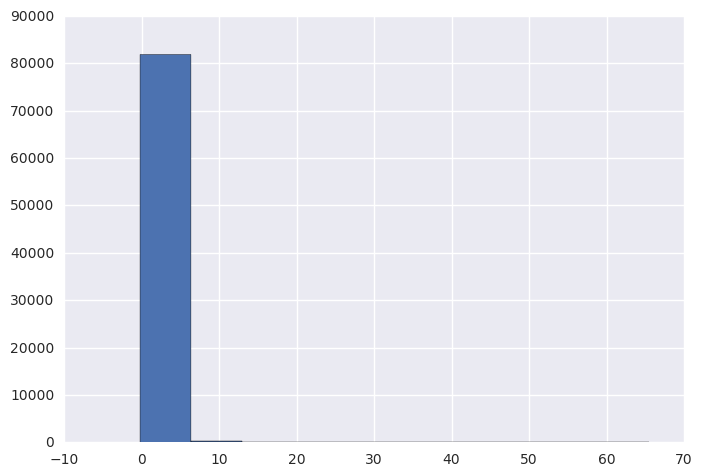

In [372]:
plt.hist(data_zscore.neg_indegree)

## linear regression on the x_zscore and y1_zscore (reputation)

In [452]:
from sklearn import linear_model

In [521]:
x.columns

Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [522]:
x=data_zscore[['posi_indegree','neg_indegree']]

In [527]:
y1=data_zscore[['reputation']]

In [528]:
linear_clf = linear_model.LinearRegression()
linear_clf.fit(x, y1)
linear_clf.coef_

array([[ 1.0943134 , -0.30390153]])

In [529]:
# the R-Squared score
linear_clf.score(x, y2)

-0.77975043466217886

In [460]:
#sum of all the residues
linear_clf.residues_ 

//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


77145.406570260297

In [ ]:
#another way to calculate RSS
np.linalg.norm(y1_zscore - y1_zscore) ** 2 

In [462]:
x_no_degree=x=data_zscore[['posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'posi_cluster', 'neg_cluster',
       'posi_close', 'neg_close']]


In [463]:
linear_clf = linear_model.LinearRegression()
linear_clf.fit(x_no_degree, y2)
linear_clf.coef_

array([ 0.06418038, -0.17847177,  0.04936819,  0.05509051,  0.08995243,
       -0.0276689 ,  0.03799953, -0.04472661])

In [465]:
linear_clf.score(x_no_degree, y2)

0.037521979753632806

In [464]:
linear_clf.residues_ 

//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


79061.794495117589

# regression between positive properties and the neg indegree

In [495]:
data_zscore.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [496]:
x_posi=data_zscore[['posi_outdegree', 'posi_indegree','posi_eigenvalue','posi_between','posi_close','posi_cluster' ]]

In [498]:
y_neg_indegree=data_zscore['neg_indegree']

In [499]:
linear_clf_posix = linear_model.LinearRegression()
linear_clf_posix.fit(x_posi, y_neg_indegree)
linear_clf_posix.coef_

array([ 0.09203691,  0.42615471, -0.06512798,  0.01759138,  0.03102244,
       -0.01760131])

In [500]:
linear_clf_posix.score(x_posi, y_neg_indegree)

0.20095663243932227

In [501]:
linear_clf.residues_ 

//anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


79061.794495117589

## Ridge regression

In [466]:
from sklearn.linear_model import Ridge

In [467]:
ridgereg = Ridge(alpha=10,normalize=True)
ridgereg.fit(x, y2)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [468]:
ridgereg.coef_ 

array([ 0.0046842 , -0.01093398,  0.00308376, -0.0029054 ,  0.00885188,
       -0.0034956 ,  0.00271266, -0.00455777])

In [469]:
ridgereg.score(x, y2) #Returns the coefficient of determination R^2 of the prediction.

0.0058622750078239916

In [470]:
ridgereg2 = Ridge(alpha=5,normalize=True)
ridgereg2.fit(x, y2)
ridgereg2.coef_ 

array([ 0.00876804, -0.02011307,  0.00589561, -0.00450435,  0.01614   ,
       -0.00628953,  0.00514142, -0.00813037])

In [471]:
ridgereg2.score(x, y2)

0.010266605491168979

# Tree modle

In [478]:
#y1= data_zscore.reputation
y1 = np.asarray(data_zscore.reputation, dtype="|S6")
y2=data_zscore.normalized_reputation
#x=data_zscore.drop(['normalized_reputation','reputation'],axis=1)
x=data_zscore[['posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'posi_cluster', 'neg_cluster',
       'posi_close', 'neg_close']]


In [479]:
x.columns

Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [397]:
from sklearn import tree
from sklearn.calibration import CalibratedClassifierCV

In [487]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(random_state=0).fit(x,y1)

In [475]:
treeclf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [476]:
treeclf.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')>

In [489]:
x.columns

Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [488]:
treeclf.feature_importances_

array([ 0.00237095,  0.47344067,  0.00150899,  0.50137665,  0.00329721,
        0.00393566,  0.0027349 ,  0.00159986,  0.00376967,  0.00272764,
        0.00195344,  0.00128435])

In [486]:
treeclf.get_params(deep=True)

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [482]:
treeclf.score(x, y2, sample_weight=None)

ValueError: Can't handle mix of continuous and multiclass

In [379]:
#tree_way = CalibratedClassifierCV(tree.DecisionTreecisionTreeClassifier(),cv=6) #default cv is 3


AttributeError: module 'sklearn.tree' has no attribute 'DecisionTreecisionTreeClassifier'

In [411]:
#y2 is continuous, needs to be changed to categorical
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded_y2 = lab_enc.fit_transform(y2)

In [412]:
print(utils.multiclass.type_of_target(y2))

continuous


In [413]:
#print(utils.multiclass.type_of_target(y2.astype('int')))

multiclass


In [415]:
print(utils.multiclass.type_of_target(encoded_y2))

multiclass


In [421]:
encoded_y2

array([1096,  950, 1532, ...,  338, 1532,  338])

In [422]:
clf_y2 = DecisionTreeClassifier(random_state=0).fit(x,encoded_y2)

In [428]:
x.columns

Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [423]:
clf_y2.feature_importances_

array([ 0.00213154,  0.3171969 ,  0.00124308,  0.65884055,  0.00327563,
        0.0033636 ,  0.00209916,  0.00159184,  0.00329161,  0.00269332,
        0.00253173,  0.00174103])

In [490]:
clf.score(x, encoded_y2, sample_weight=None)

//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:177: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0

In [427]:
clf_y2.get_params(deep=True)

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [445]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes=50)
clf_entropy.fit(x, encoded_y2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=50, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [492]:
x.columns

Index(['posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree',
       'posi_eigenvalue', 'neg_eigenvalue', 'posi_between', 'neg_between',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [491]:
clf_entropy.feature_importances_

array([ 0.        ,  0.54262801,  0.        ,  0.45737199,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [446]:
clf_entropy.max_features

In [447]:
tree.export_graphviz(clf_entropy,out_file='tree2.dot')   

In [448]:
from sklearn.externals.six import StringIO  
import pydotplus 
dotfile = StringIO() 
tree.export_graphviz(clf_entropy, out_file=dotfile) 
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("my_tree2.png")

True

## test the tree model without degree property

## Lasso Regression

In [ ]:
from sklearn import linear_model

In [ ]:
lassoreg = linear_model.Lasso(alpha=0.1)

In [ ]:
lassoreg.fit(x_zscore, y1_zscore)

In [ ]:
print(lassoreg.coef_)
print(lassoreg.intercept_)


In [ ]:
lassoreg.score(x_zscore, y1_zscore)

## linear regression on the x_zscore and y2_zscore_nolog(normalized_reputation)

In [ ]:
reg_zscore2 = linear_model.LinearRegression()
lr_model2=reg_zscore2.fit(x_zscore, y2_zscore_nolog)
reg_zscore2.coef_

In [ ]:
reg_zscore2.intercept_

In [ ]:
reg_zscore2.residues_ 

In [ ]:
reg_zscore2.score(x_zscore, y1_zscore)

In [ ]:
#SVC model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC 
svc_way = CalibratedClassifierCV(LinearSVC())
svc_model=svc_way.fit(x, y) 
svc_predict=svc_model.predict_proba(validation_data)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

true_click=validation['click']
mean_squared_error(true_click,tree_click_ctr )

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

#roc_curve(true_click, lg_click_ctr, pos_label=2)  fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(true_click, lg_click_ctr)
print ("The AUC is:",metrics.auc(fpr, tpr))
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#roc_auc = auc(fpr, tpr)